#### **Importing the Required libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import mlflow
import math
import joblib


#### **Reading and removing the null values**

In [2]:
df = pd.read_csv(r"Flight_Price.csv",encoding='latin1')

In [3]:
df.dropna(inplace=True)

#### **Modifying the dataset to the desired format**

In [4]:
df["Dept_time_hrs"] = pd.to_datetime(df['Dep_Time'],format="%H:%M").dt.hour
df["Dept_time_mins"] = pd.to_datetime(df['Dep_Time'],format="%H:%M").dt.minute
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dept_time_hrs,Dept_time_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,16,50


In [5]:
df['Journey_Day'] = pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.day
df['Journey_month'] = pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.month
df['Journey_year'] = pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.year
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dept_time_hrs,Dept_time_mins,Journey_Day,Journey_month,Journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,22,20,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,50,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,25,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,18,5,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,16,50,1,3,2019


In [6]:
df.drop(['Date_of_Journey'],inplace=True,axis=1)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dept_time_hrs,Dept_time_mins,Journey_Day,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,22,20,24,3,2019
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,50,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,25,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,18,5,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,16,50,1,3,2019


In [7]:
df["Arrival_time_hrs"] = pd.to_datetime(df['Arrival_Time']).dt.hour
df["Arrival_time_mins"] = pd.to_datetime(df['Arrival_Time']).dt.minute
df.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16412\3481045460.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Arrival_time_hrs"] = pd.to_datetime(df['Arrival_Time']).dt.hour
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16412\3481045460.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Arrival_time_mins"] = pd.to_datetime(df['Arrival_Time']).dt.minute


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dept_time_hrs,Dept_time_mins,Journey_Day,Journey_month,Journey_year,Arrival_time_hrs,Arrival_time_mins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,22,20,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,50,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,25,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,18,5,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,16,50,1,3,2019,21,35


In [8]:

df['departure'] = pd.to_timedelta(df['Dept_time_hrs'], unit='h') + pd.to_timedelta(df['Dept_time_mins'], unit='m')
df['arrival'] = pd.to_timedelta(df['Arrival_time_hrs'], unit='h') + pd.to_timedelta(df['Arrival_time_mins'], unit='m')
df['duration'] = df['arrival'] - df['departure']
df['duration_hours'] = df['duration'].dt.components.hours
df['duration_minutes'] = df['duration'].dt.components.minutes

# Display the result
df.head()




,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,...,Journey_Day,Journey_month,Journey_year,Arrival_time_hrs,Arrival_time_mins,departure,arrival,duration,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,...,24,3,2019,1,10,0 days 22:20:00,0 days 01:10:00,-1 days +02:50:00,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,...,1,5,2019,13,15,0 days 05:50:00,0 days 13:15:00,0 days 07:25:00,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,...,9,6,2019,4,25,0 days 09:25:00,0 days 04:25:00,-1 days +19:00:00,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,...,12,5,2019,23,30,0 days 18:05:00,0 days 23:30:00,0 days 05:25:00,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,...,1,3,2019,21,35,0 days 16:50:00,0 days 21:35:00,0 days 04:45:00,4,45


#### **Creting new feature as arrival date**

In [9]:
df['Arrival_Date'] = pd.to_datetime(df['Journey_Day'].astype(str) + '/' + df['Journey_month'].astype(str) + '/' + df['Journey_year'].astype(str) + ' ' + df['Dep_Time']) + pd.to_timedelta(df['duration_hours'], unit='h') + pd.to_timedelta(df['duration_minutes'], unit='m')
df['Arrival_Date_day'] = df['Arrival_Date'].dt.day
df['Arrival_Date_month'] = df['Arrival_Date'].dt.month
df['Arrival_Date_year'] = df['Arrival_Date'].dt.year
df.drop(['Arrival_Date'],axis=1,inplace=True)
df.drop(['Dep_Time','Arrival_Time','Duration','departure','arrival','duration'],axis=1,inplace=True)
df.head()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16412\1480569178.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Arrival_Date'] = pd.to_datetime(df['Journey_Day'].astype(str) + '/' + df['Journey_month'].astype(str) + '/' + df['Journey_year'].astype(str) + ' ' + df['Dep_Time']) + pd.to_timedelta(df['duration_hours'], unit='h') + pd.to_timedelta(df['duration_minutes'], unit='m')


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dept_time_hrs,Dept_time_mins,Journey_Day,Journey_month,Journey_year,Arrival_time_hrs,Arrival_time_mins,duration_hours,duration_minutes,Arrival_Date_day,Arrival_Date_month,Arrival_Date_year
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,22,20,24,3,2019,1,10,2,50,25,3,2019
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,5,50,1,5,2019,13,15,7,25,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,9,25,9,6,2019,4,25,19,0,10,6,2019
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,18,5,12,5,2019,23,30,5,25,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,16,50,1,3,2019,21,35,4,45,1,3,2019


### **Handling categorical data**
**Airline column**

In [10]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

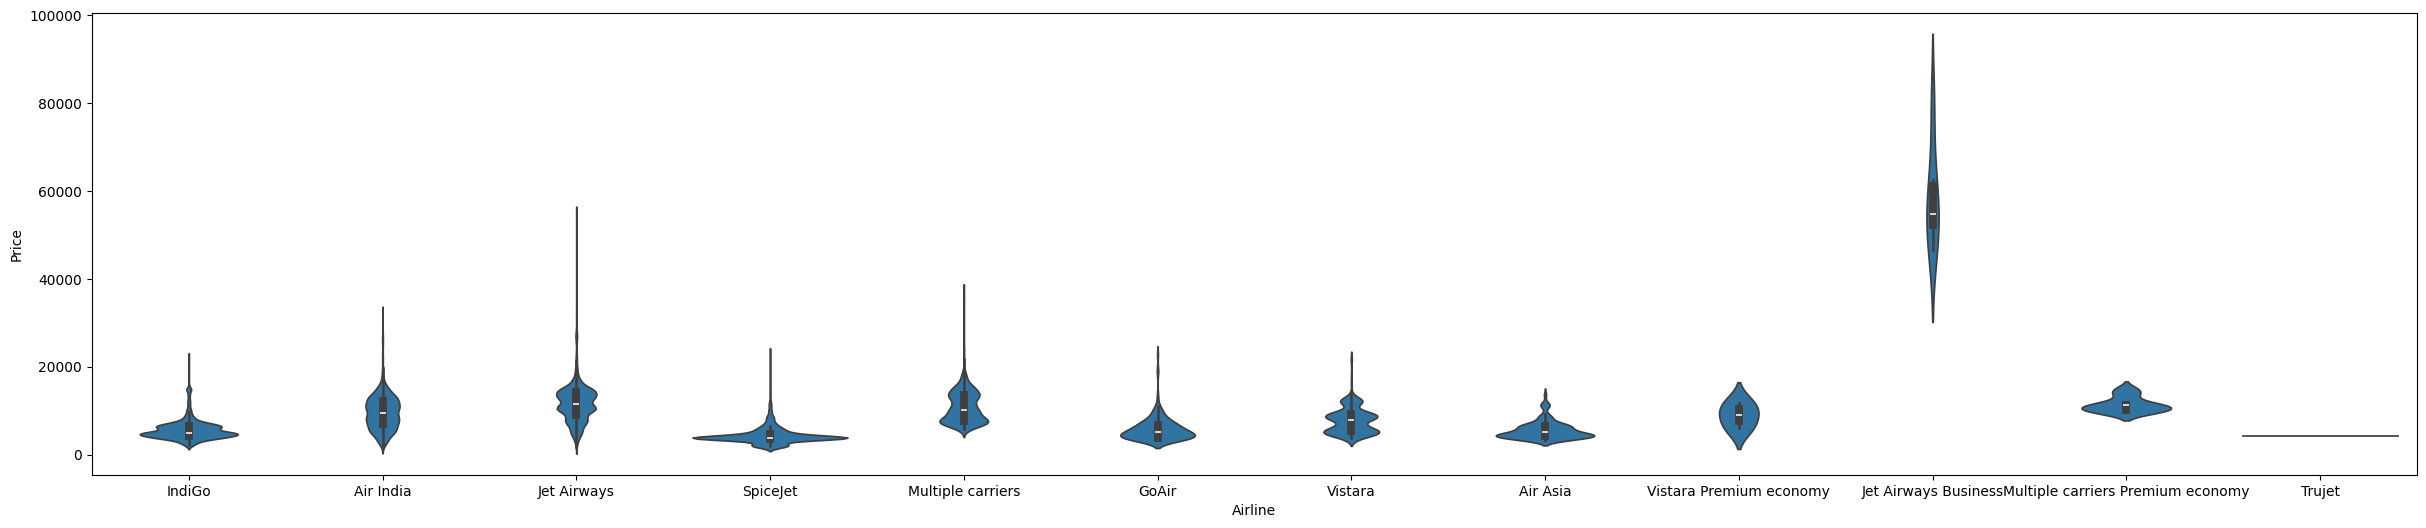

In [11]:
plt.figure(figsize=(30, 6))
sns.violinplot(x='Airline',y='Price',data=df)
plt.savefig('Airline.png',bbox_inches='tight')
plt.show()

In [12]:
# since the median value for all airlines is almost same, we can say that this data is nominal data and we can use one hot encoding to convert it into numerical data
df = pd.get_dummies(df, columns=['Airline'],dtype=int,drop_first=True)
df.head()

,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dept_time_hrs,Dept_time_mins,Journey_Day,Journey_month,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,22,20,24,3,...,0,1,0,0,0,0,0,0,0,0
1,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,5,50,1,5,...,0,0,0,0,0,0,0,0,0,0
2,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,9,25,9,6,...,0,0,1,0,0,0,0,0,0,0
3,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,18,5,12,5,...,0,1,0,0,0,0,0,0,0,0
4,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,16,50,1,3,...,0,1,0,0,0,0,0,0,0,0


In [13]:
df.columns

Index(['Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info',
       'Price', 'Dept_time_hrs', 'Dept_time_mins', 'Journey_Day',
       'Journey_month', 'Journey_year', 'Arrival_time_hrs',
       'Arrival_time_mins', 'duration_hours', 'duration_minutes',
       'Arrival_Date_day', 'Arrival_Date_month', 'Arrival_Date_year',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy'],
      dtype='object')

**Source column**

In [14]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

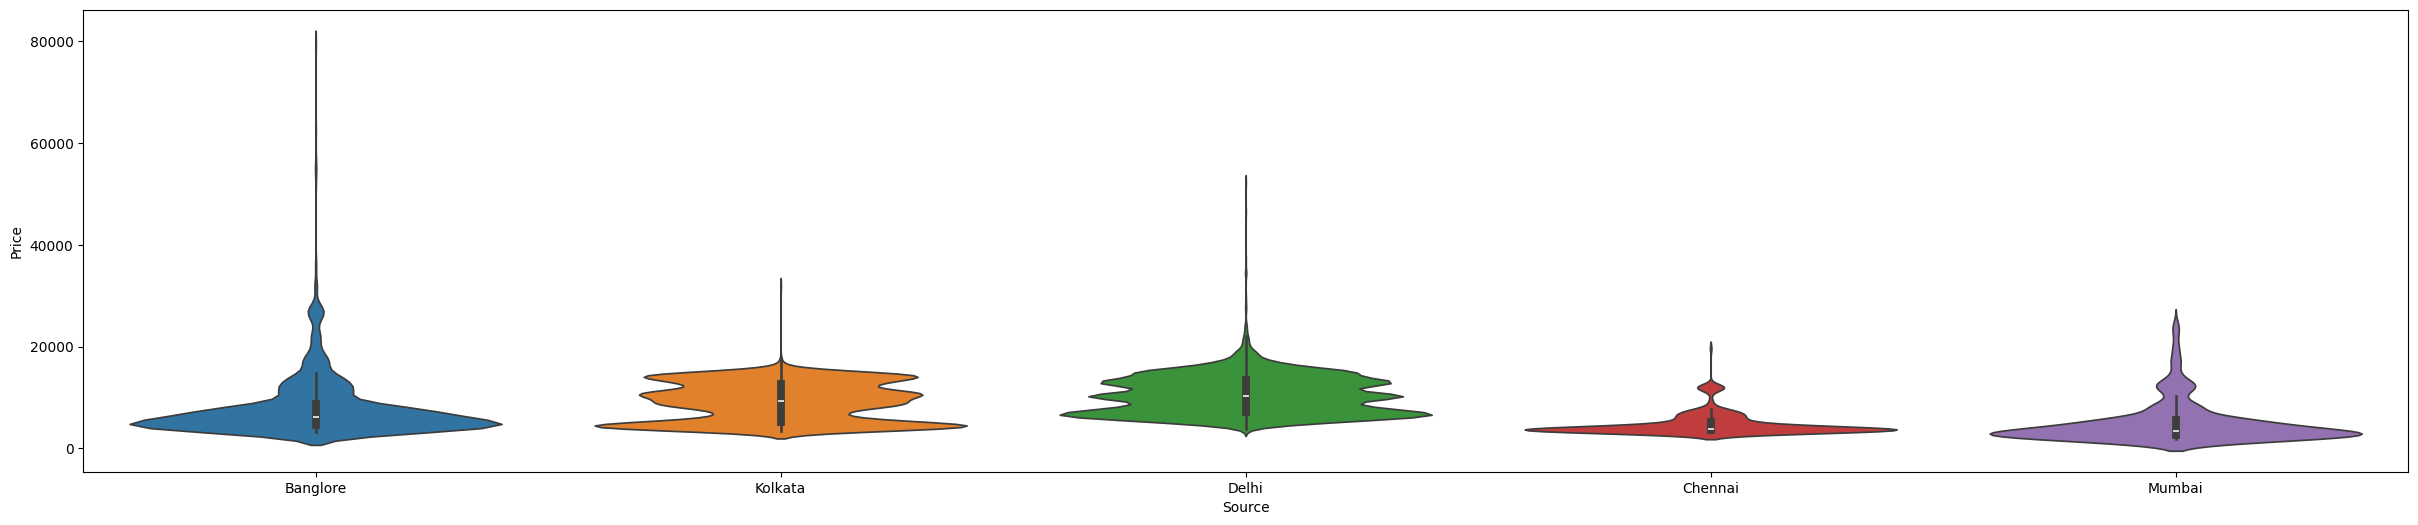

In [15]:
plt.figure(figsize=(30, 6))
sns.violinplot(x = "Source", y = "Price", data = df, hue = "Source")
plt.savefig('Source.png',dpi=300)
plt.show()

In [16]:
# since the median value for all sources is almost same, we can say that this data is nominal data and we can use one hot encoding to convert it into numerical data
df = pd.get_dummies(df, columns=['Source'],dtype=int,drop_first=True)
df.head()

,Destination,Route,Total_Stops,Additional_Info,Price,Dept_time_hrs,Dept_time_mins,Journey_Day,Journey_month,Journey_year,...,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,New Delhi,BLR ? DEL,non-stop,No info,3897,22,20,24,3,2019,...,0,0,0,0,0,0,0,0,0,0
1,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,5,50,1,5,2019,...,0,0,0,0,0,0,0,0,1,0
2,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,9,25,9,6,2019,...,0,0,0,0,0,0,0,1,0,0
3,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,18,5,12,5,2019,...,0,0,0,0,0,0,0,0,1,0
4,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,16,50,1,3,2019,...,0,0,0,0,0,0,0,0,0,0


**Destination**

In [17]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

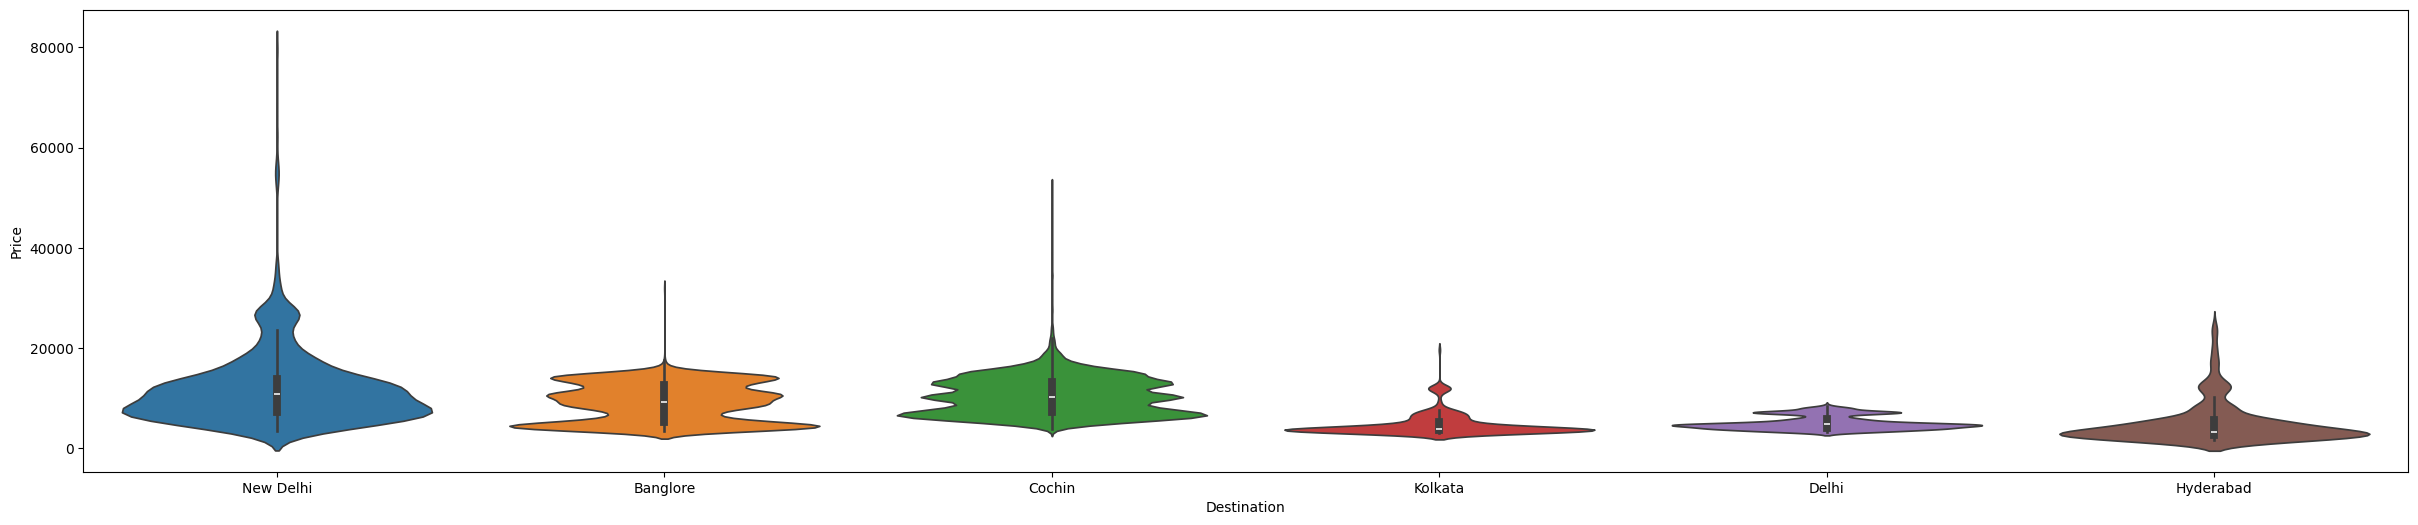

In [18]:
plt.figure(figsize=(30, 6))
sns.violinplot(x = "Destination", y = "Price", data = df, hue = "Destination")
plt.savefig('Destination.png',dpi=300)
plt.show()

In [19]:
# The column destination is also nominal data and we can use one hot encoding to convert it into numerical data
df = pd.get_dummies(df, columns=['Destination'],dtype=int,drop_first=True)
df.head()

,Route,Total_Stops,Additional_Info,Price,Dept_time_hrs,Dept_time_mins,Journey_Day,Journey_month,Journey_year,Arrival_time_hrs,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR ? DEL,non-stop,No info,3897,22,20,24,3,2019,1,...,0,0,0,0,0,0,0,0,0,1
1,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,5,50,1,5,2019,13,...,0,0,0,1,0,0,0,0,0,0
2,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,9,25,9,6,2019,4,...,0,0,1,0,0,1,0,0,0,0
3,CCU ? NAG ? BLR,1 stop,No info,6218,18,5,12,5,2019,23,...,0,0,0,1,0,0,0,0,0,0
4,BLR ? NAG ? DEL,1 stop,No info,13302,16,50,1,3,2019,21,...,0,0,0,0,0,0,0,0,0,1


In [20]:
df['Additional_Info'].value_counts(normalize=True)

Additional_Info
No info                         0.781127
In-flight meal not included     0.185546
No check-in baggage included    0.029957
1 Long layover                  0.001779
Change airports                 0.000655
Business class                  0.000374
No Info                         0.000281
1 Short layover                 0.000094
Red-eye flight                  0.000094
2 Long layover                  0.000094
Name: proportion, dtype: float64

In [21]:
# as we can see that 80% of the data is no_info, we can drop this column as it will not have any impact on the price
# Also the column Total_Stops is same as the column route.So we can drop the column Route as well
df.drop(['Additional_Info','Route'],axis=1,inplace=True)
df.head()

,Total_Stops,Price,Dept_time_hrs,Dept_time_mins,Journey_Day,Journey_month,Journey_year,Arrival_time_hrs,Arrival_time_mins,duration_hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,non-stop,3897,22,20,24,3,2019,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,2 stops,7662,5,50,1,5,2019,13,15,7,...,0,0,0,1,0,0,0,0,0,0
2,2 stops,13882,9,25,9,6,2019,4,25,19,...,0,0,1,0,0,1,0,0,0,0
3,1 stop,6218,18,5,12,5,2019,23,30,5,...,0,0,0,1,0,0,0,0,0,0
4,1 stop,13302,16,50,1,3,2019,21,35,4,...,0,0,0,0,0,0,0,0,0,1


**Total stops**

In [22]:
df['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

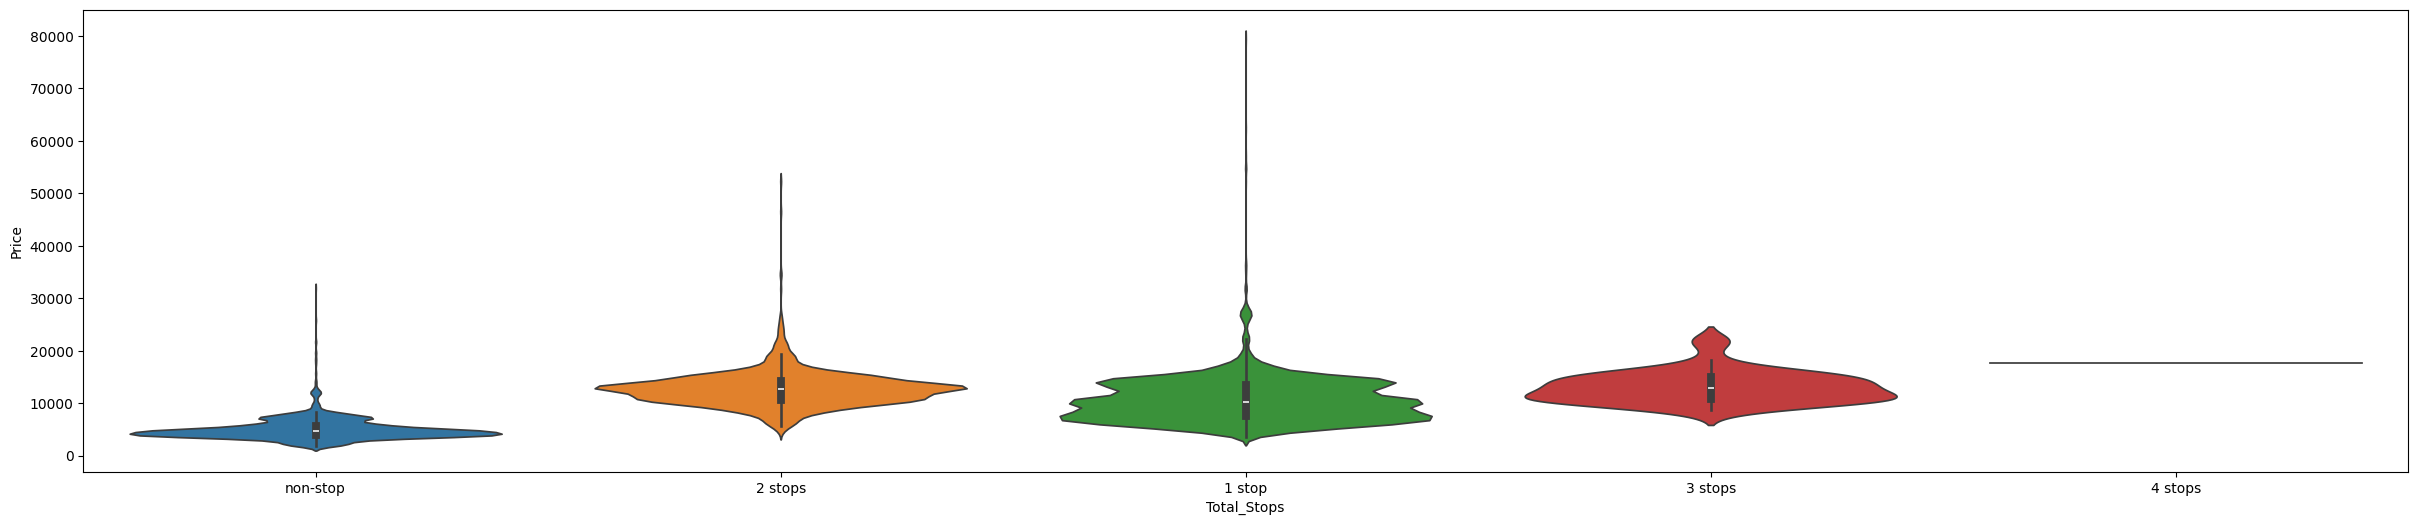

In [23]:
plt.figure(figsize=(30, 6))
sns.violinplot(x = "Total_Stops", y = "Price", data = df, hue = "Total_Stops")
plt.show()

In [24]:
# Initialize the label encoder for Total_Stops as it is ordinal data.
df['Total_Stops'].replace({"non-stop": 0, "1 stop":  1, "2 stops":2, "3 stops":3, "4 stops": 4}, inplace = True)
df['Total_Stops'] = df['Total_Stops'].astype(int)
df.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16412\2621439756.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total_Stops'].replace({"non-stop": 0, "1 stop":  1, "2 stops":2, "3 stops":3, "4 stops": 4}, inplace = True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16412\2621439756.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option(

,Total_Stops,Price,Dept_time_hrs,Dept_time_mins,Journey_Day,Journey_month,Journey_year,Arrival_time_hrs,Arrival_time_mins,duration_hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,22,20,24,3,2019,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,50,1,5,2019,13,15,7,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,25,9,6,2019,4,25,19,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,18,5,12,5,2019,23,30,5,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,16,50,1,3,2019,21,35,4,...,0,0,0,0,0,0,0,0,0,1


In [25]:
df['Total_Stops'].value_counts()

Total_Stops
1    5625
0    3491
2    1520
3      45
4       1
Name: count, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10682 non-null  int32
 1   Price                                      10682 non-null  int64
 2   Dept_time_hrs                              10682 non-null  int32
 3   Dept_time_mins                             10682 non-null  int32
 4   Journey_Day                                10682 non-null  int32
 5   Journey_month                              10682 non-null  int32
 6   Journey_year                               10682 non-null  int32
 7   Arrival_time_hrs                           10682 non-null  int32
 8   Arrival_time_mins                          10682 non-null  int32
 9   duration_hours                             10682 non-null  int64
 10  duration_minutes                           10682 no

In [27]:
df

,Total_Stops,Price,Dept_time_hrs,Dept_time_mins,Journey_Day,Journey_month,Journey_year,Arrival_time_hrs,Arrival_time_mins,duration_hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,22,20,24,3,2019,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,50,1,5,2019,13,15,7,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,25,9,6,2019,4,25,19,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,18,5,12,5,2019,23,30,5,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,16,50,1,3,2019,21,35,4,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,19,55,9,4,2019,22,25,2,...,0,0,0,1,0,0,0,0,0,0
10679,0,4145,20,45,27,4,2019,23,20,2,...,0,0,0,1,0,0,0,0,0,0
10680,0,7229,8,20,27,4,2019,11,20,3,...,0,0,0,0,0,0,1,0,0,0
10681,0,12648,11,30,1,3,2019,14,10,2,...,0,0,0,0,0,0,0,0,0,1


#### **checking for outliers**


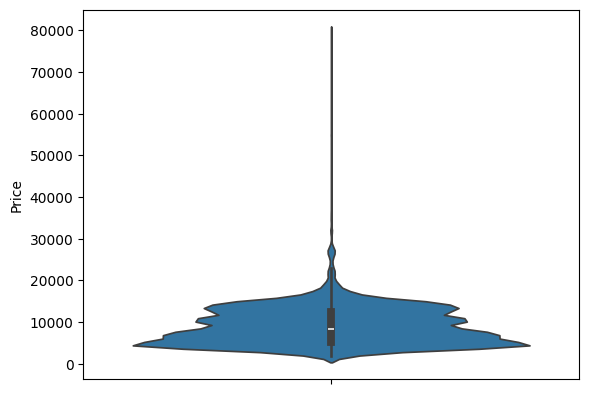

In [28]:
sns.violinplot(df['Price'])
plt.savefig('with outliers.png',dpi=300) #violin plot to check the distribution of the target variable
plt.show()

In [29]:
mid = df['Price'].median() # removing outliers using IQR
Q1 = df[df['Price']<mid]
Q2 = df[df['Price']>mid]
Q1_mid = Q1['Price'].median()
Q2_mid = Q2['Price'].median()

IQR = Q2_mid-Q1_mid
l_f = Q1_mid-1.5*IQR
u_f = Q2_mid+1.5*IQR
df = df[(df['Price']>=l_f) & (df['Price']<=u_f)]
df.index = range(len(df))
df

,Total_Stops,Price,Dept_time_hrs,Dept_time_mins,Journey_Day,Journey_month,Journey_year,Arrival_time_hrs,Arrival_time_mins,duration_hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,22,20,24,3,2019,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,50,1,5,2019,13,15,7,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,25,9,6,2019,4,25,19,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,18,5,12,5,2019,23,30,5,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,16,50,1,3,2019,21,35,4,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10583,0,4107,19,55,9,4,2019,22,25,2,...,0,0,0,1,0,0,0,0,0,0
10584,0,4145,20,45,27,4,2019,23,20,2,...,0,0,0,1,0,0,0,0,0,0
10585,0,7229,8,20,27,4,2019,11,20,3,...,0,0,0,0,0,0,1,0,0,0
10586,0,12648,11,30,1,3,2019,14,10,2,...,0,0,0,0,0,0,0,0,0,1


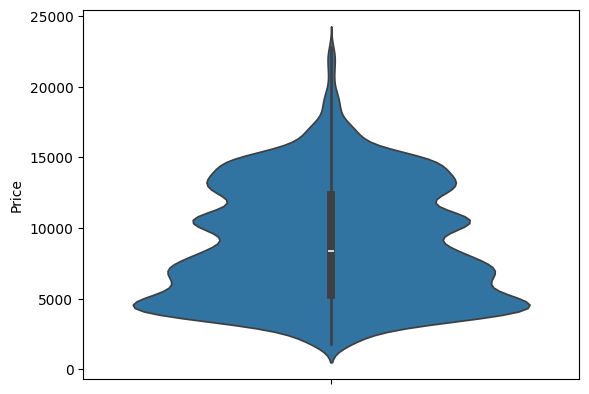

In [30]:
sns.violinplot(df['Price'])#viloin plot after removing outliers
plt.savefig('without outliers.png',dpi=300)
plt.show()

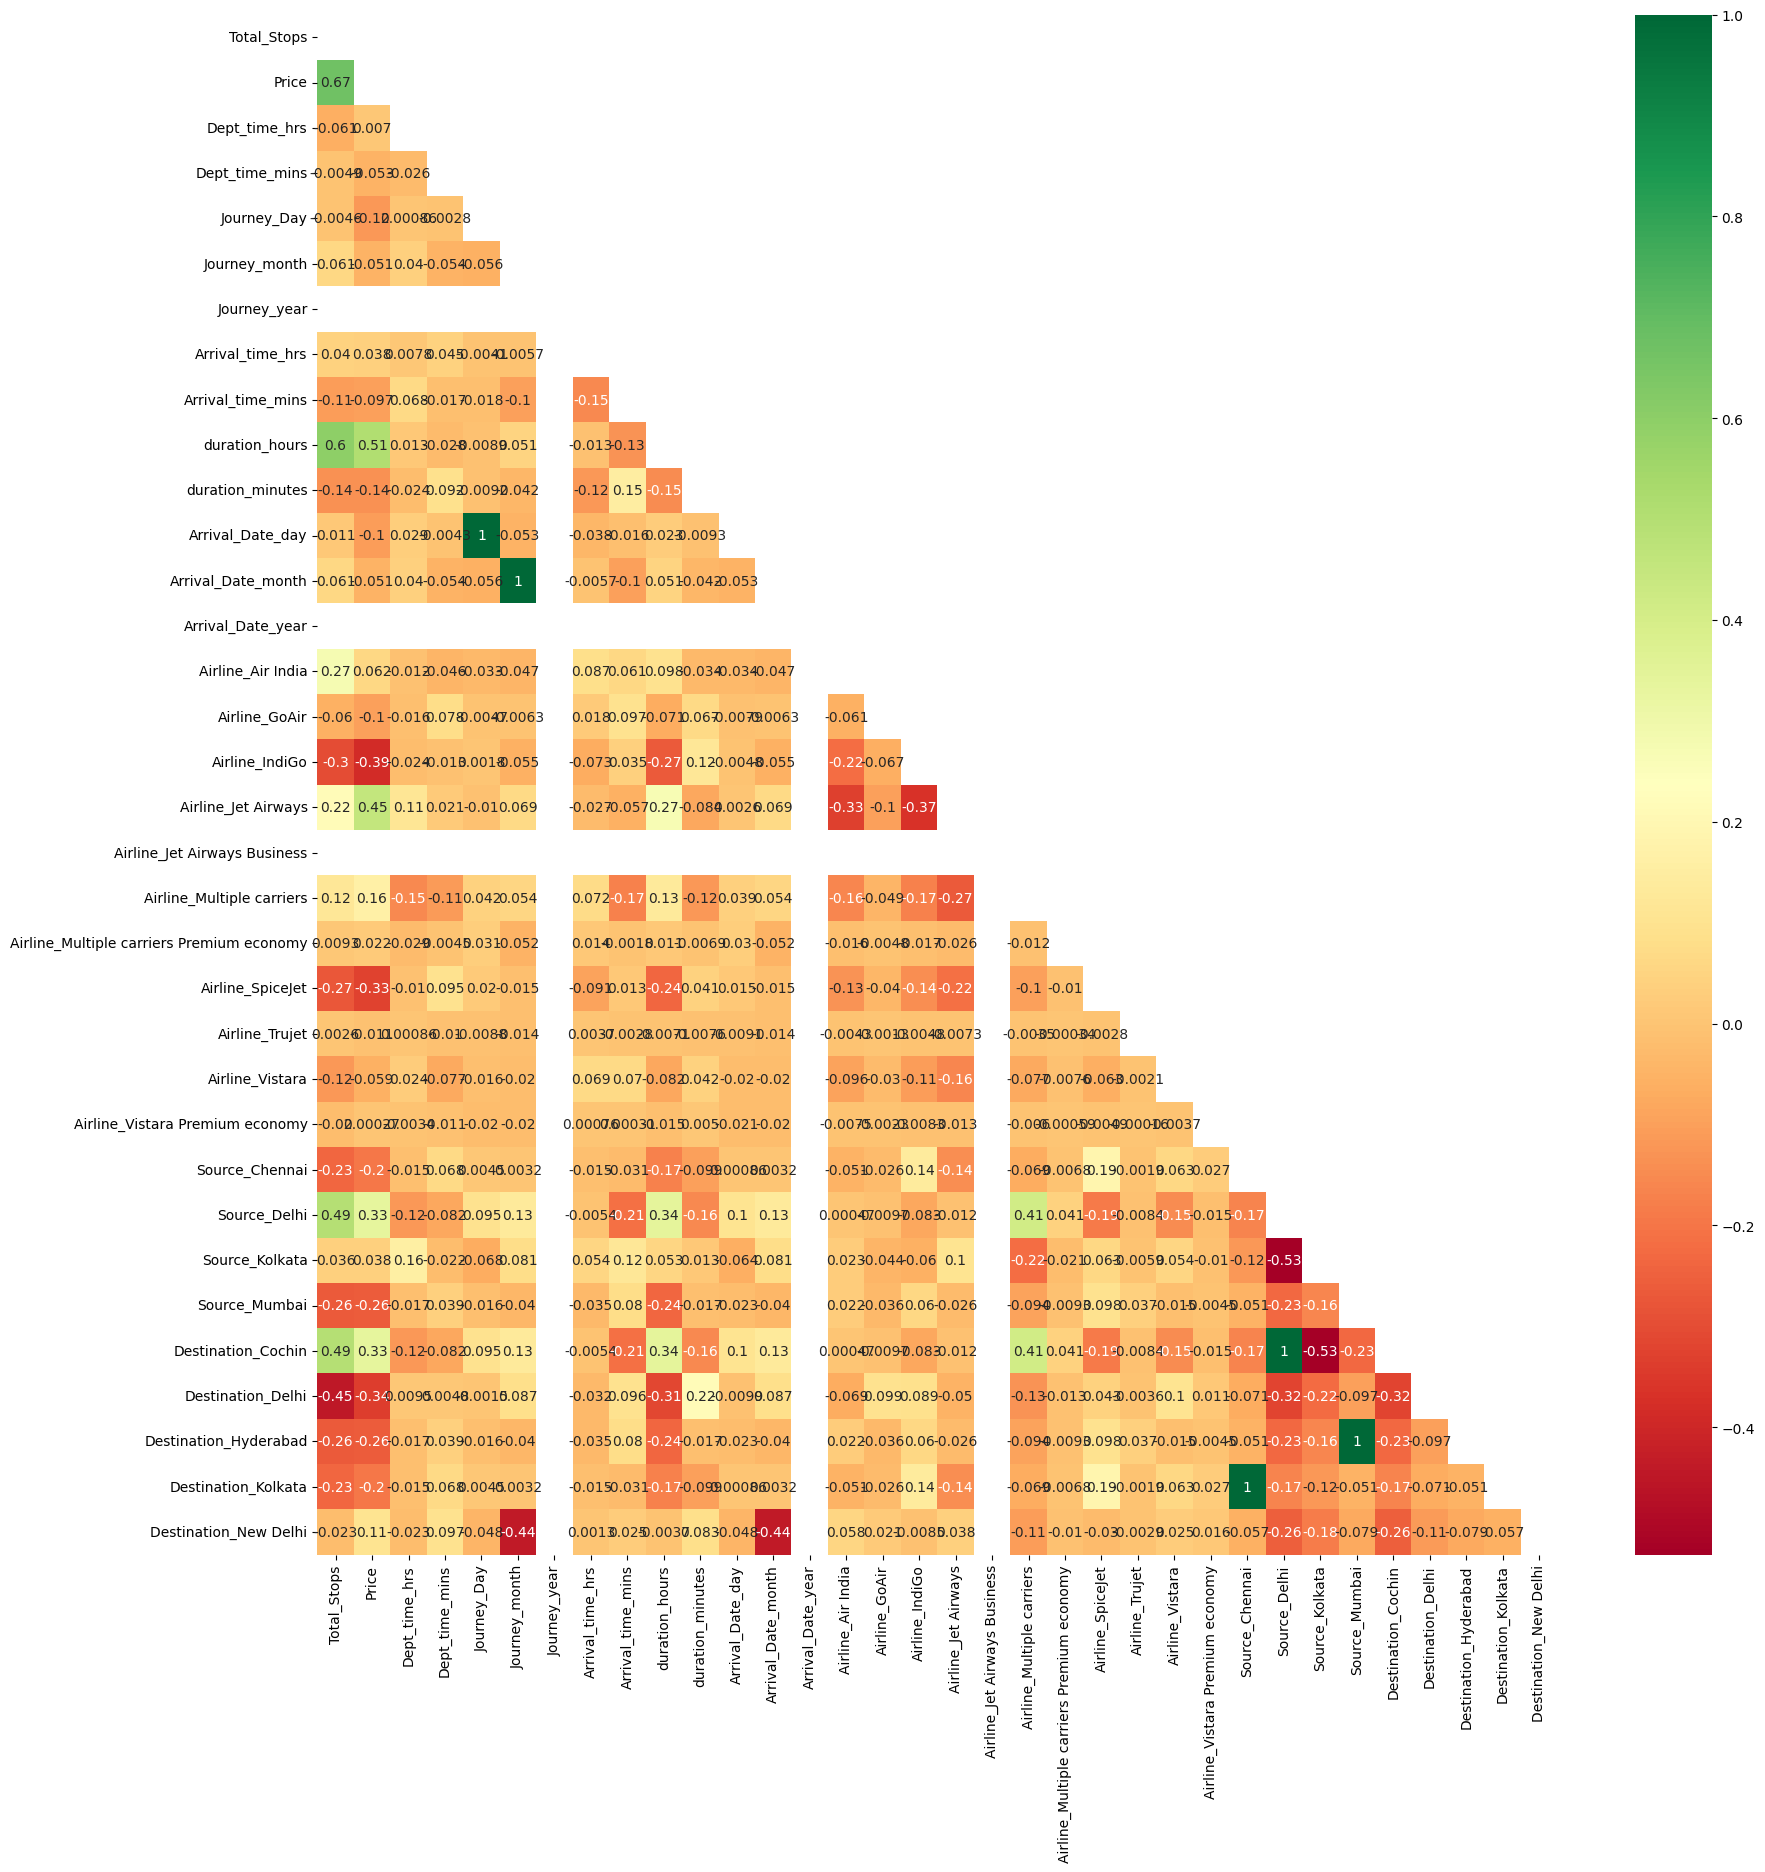

In [37]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True,cmap = "RdYlGn", mask= np.triu(df.corr()))
plt.savefig('correlation.png',dpi=300)
plt.show()

In [32]:
features_cols = [
    'Total_Stops', 'Dept_time_hrs', 'Dept_time_mins', 'Journey_Day', 'Journey_month', 'Journey_year',
    'Arrival_time_hrs', 'Arrival_time_mins', 'duration_hours', 'duration_minutes', 'Arrival_Date_day',
    'Arrival_Date_month', 'Arrival_Date_year', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
    'Airline_Jet Airways', 'Airline_Jet Airways Business', 'Airline_Multiple carriers',
    'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet', 'Airline_Trujet', 'Airline_Vistara',
    'Airline_Vistara Premium economy', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
    'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi'
]

#### **Converting the Cleaned data to csv**

In [33]:
df.to_csv("Flight_Price_Preprocessed.csv",index=False)

#### **ML model training and integrating it with MLflow and logging the model with the metrics of the train data**

In [34]:
scalar = StandardScaler()
x = df.drop(['Price'],axis=1)
y = df['Price']
x = scalar.fit_transform(x)
joblib.dump(scalar, 'scaler_path.pkl')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x


array([[-1.21448777,  1.6553512 , -0.23102178, ..., -0.2644376 ,
        -0.19320281,  3.36327636],
       [ 1.74262307, -1.30400236,  1.37085024, ..., -0.2644376 ,
        -0.19320281, -0.29732912],
       [ 1.74262307, -0.60768388,  0.03595689, ..., -0.2644376 ,
        -0.19320281, -0.29732912],
       ...,
       [-1.21448777, -0.7817635 , -0.23102178, ..., -0.2644376 ,
        -0.19320281, -0.29732912],
       [-1.21448777, -0.25952463,  0.30293556, ..., -0.2644376 ,
        -0.19320281,  3.36327636],
       [ 1.74262307, -0.43360425,  1.63782891, ..., -0.2644376 ,
        -0.19320281, -0.29732912]])

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


******************** train: LinearRegression ********************
LinearRegression best params: {}
LinearRegression MSE on train set: 5815922.865162141
LinearRegression RMSE on train set: 2411.622454938198
LinearRegression R² on train set: 0.6496425857269341


2025/03/08 12:02:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


******************** Test: LinearRegression ********************
LinearRegression best params: {}
LinearRegression MSE on test set: 1.889283049084999e+30
LinearRegression RMSE on test set: 1374511931226862.5
LinearRegression R² on test set: -1.1531338194707112e+23


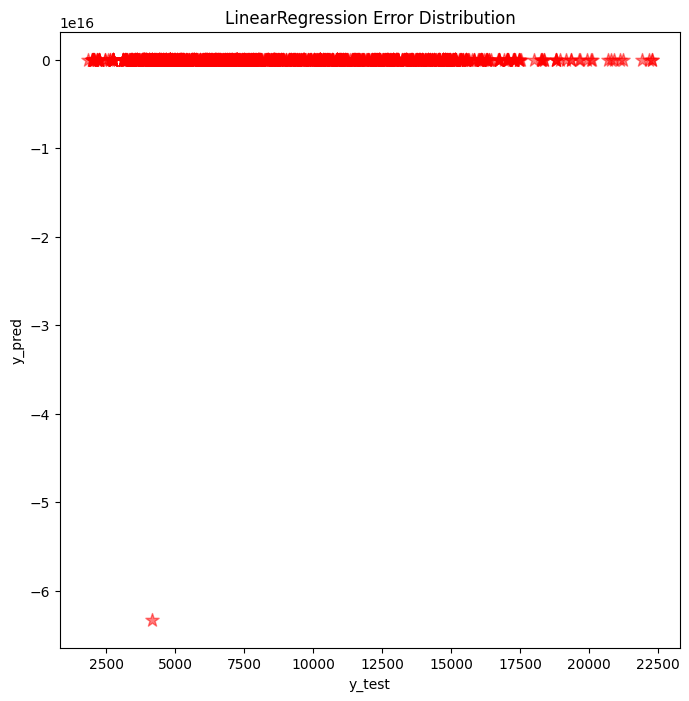

🏃 View run LinearRegression at: http://127.0.0.1:5000/#/experiments/391970237538713523/runs/6428c38b6cf245378646c75b090729c3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/391970237538713523


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 

******************** train: KNeighbors ********************
KNeighbors best params: {'n_neighbors': 6}
KNeighbors MSE on train set: 2609751.2771021905
KNeighbors RMSE on train set: 1615.4724625019737
KNeighbors R² on train set: 0.8427857916035371


2025/03/08 12:02:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


******************** Test: KNeighbors ********************
KNeighbors best params: {'n_neighbors': 6}
KNeighbors MSE on test set: 4000241.3961677686
KNeighbors RMSE on test set: 2000.060348131468
KNeighbors R² on test set: 0.7558431680101175


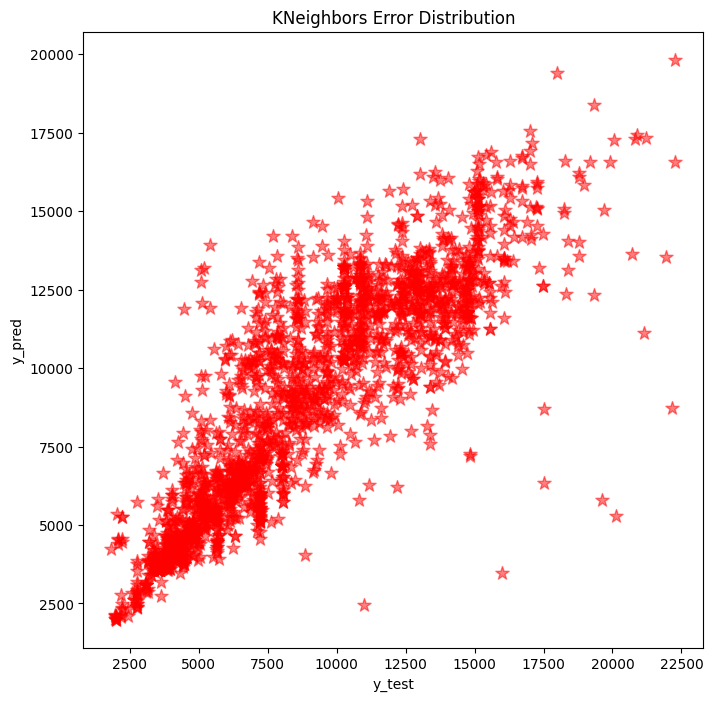

🏃 View run KNeighbors at: http://127.0.0.1:5000/#/experiments/391970237538713523/runs/54dd0c780b564d3586a217f9850e6672
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/391970237538713523


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


******************** train: DecisionTree ********************
DecisionTree best params: {'max_depth': 9}
DecisionTree MSE on train set: 2500203.2491370137
DecisionTree RMSE on train set: 1581.2031017984418
DecisionTree R² on train set: 0.8493850819838304


2025/03/08 12:02:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


******************** Test: DecisionTree ********************
DecisionTree best params: {'max_depth': 9}
DecisionTree MSE on test set: 3665202.495278961
DecisionTree RMSE on test set: 1914.4718580535366
DecisionTree R² on test set: 0.7762924430745548


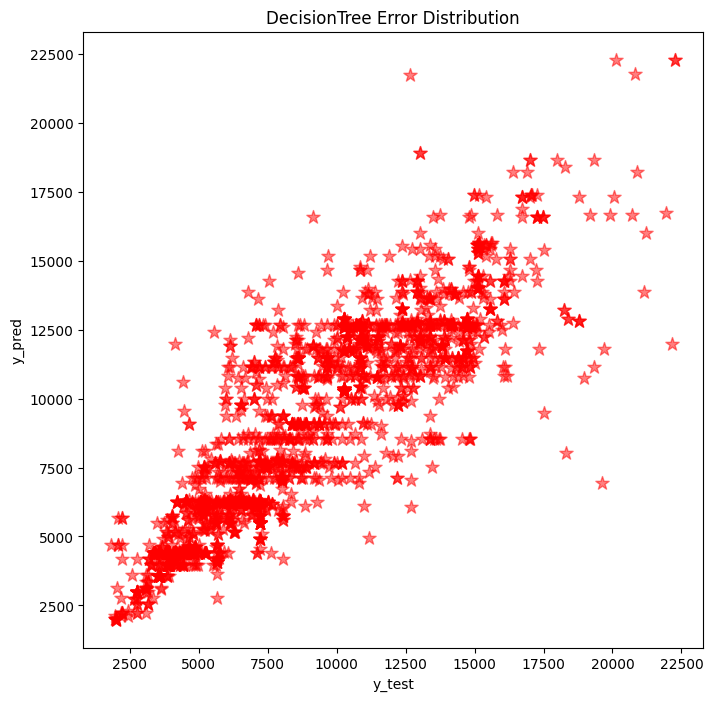

🏃 View run DecisionTree at: http://127.0.0.1:5000/#/experiments/391970237538713523/runs/578857485e4b450fa3bda518c0b57688
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/391970237538713523
******************** train: Ridge ********************
Ridge best params: {'alpha': 1.0}
Ridge MSE on train set: 5816730.857759816
Ridge RMSE on train set: 2411.789969661499
Ridge R² on train set: 0.6495939113885985


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
2025/03/08 12:02:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


******************** Test: Ridge ********************
Ridge best params: {'alpha': 1.0}
Ridge MSE on test set: 5903251.442635669
Ridge RMSE on test set: 2429.6607669869613
Ridge R² on test set: 0.6396919515771193


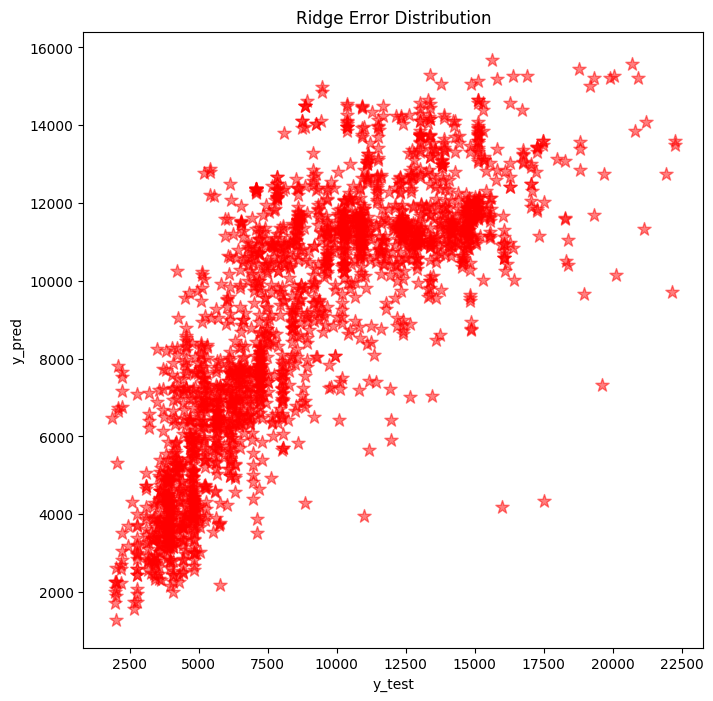

🏃 View run Ridge at: http://127.0.0.1:5000/#/experiments/391970237538713523/runs/f0de62f776f74e72a3b2acfd2c5028aa
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/391970237538713523


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.444e+08, tolerance: 1.129e+07
  model = cd_fast.enet_coordinate_descent(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.452e+08, tolerance: 1.124e+07
  model =

******************** train: Lasso ********************
Lasso best params: {'alpha': 0.1}
Lasso MSE on train set: 5816730.624820585
Lasso RMSE on train set: 2411.789921369725
Lasso R² on train set: 0.6495939254211067


2025/03/08 12:02:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


******************** Test: Lasso ********************
Lasso best params: {'alpha': 0.1}
Lasso MSE on test set: 5903252.770795434
Lasso RMSE on test set: 2429.6610403090044
Lasso R² on test set: 0.6396918705121913


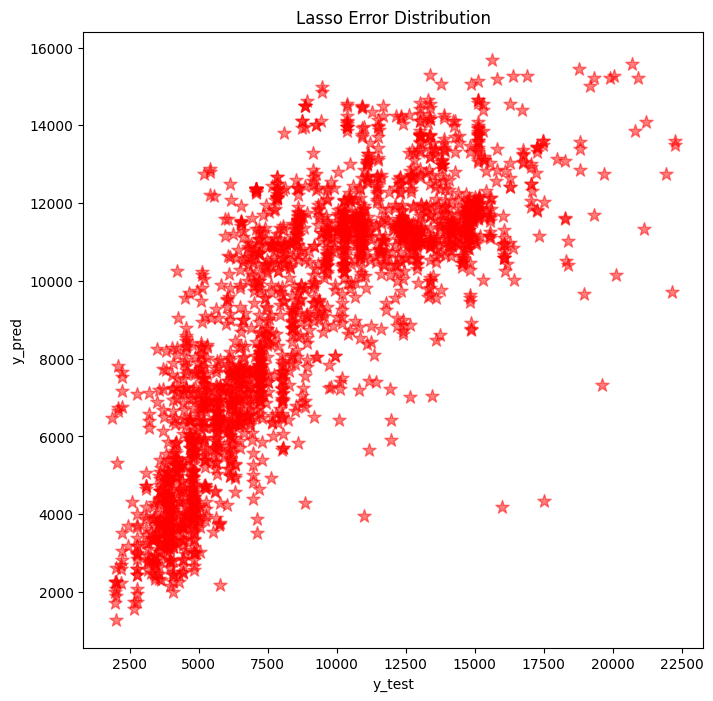

🏃 View run Lasso at: http://127.0.0.1:5000/#/experiments/391970237538713523/runs/8593d7772ce04cb7ba95d72d6888813e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/391970237538713523
******************** train: RandomForest ********************
RandomForest best params: {'n_estimators': 334, 'max_depth': 11}
RandomForest MSE on train set: 1561559.4847754461
RandomForest RMSE on train set: 1249.623737280725
RandomForest R² on train set: 0.905929986348907


2025/03/08 12:06:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


******************** Test: RandomForest ********************
RandomForest best params: {'n_estimators': 334, 'max_depth': 11}
RandomForest MSE on test set: 2793602.1891539404
RandomForest RMSE on test set: 1671.4072481456876
RandomForest R² on test set: 0.8294910249673292


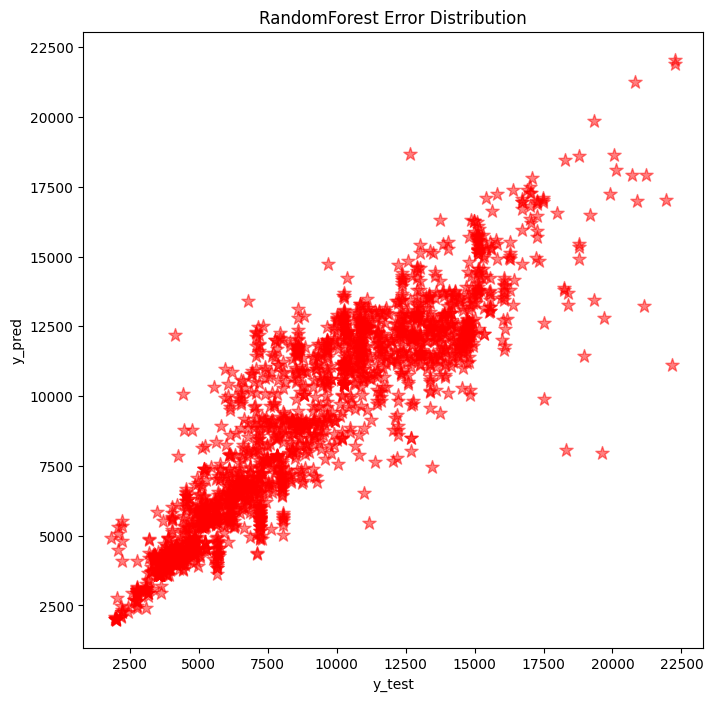

🏃 View run RandomForest at: http://127.0.0.1:5000/#/experiments/391970237538713523/runs/6a7c06ea7a934569a83e6c3a76504157
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/391970237538713523
******************** train: AdaBoost ********************
AdaBoost best params: {'n_estimators': 114, 'loss': 'linear', 'learning_rate': 0.1}
AdaBoost MSE on train set: 5677275.768479867
AdaBoost RMSE on train set: 2382.703457940133
AdaBoost R² on train set: 0.6579948351319329


2025/03/08 12:08:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


******************** Test: AdaBoost ********************
AdaBoost best params: {'n_estimators': 114, 'loss': 'linear', 'learning_rate': 0.1}
AdaBoost MSE on test set: 5734132.5556322895
AdaBoost RMSE on test set: 2394.604885076511
AdaBoost R² on test set: 0.6500142115587187


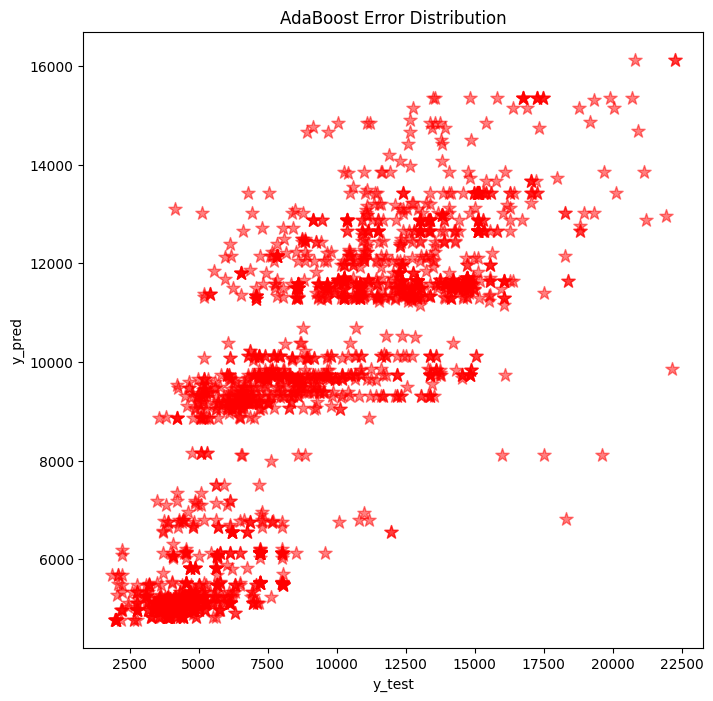

🏃 View run AdaBoost at: http://127.0.0.1:5000/#/experiments/391970237538713523/runs/7c28105af9d94bce948738a0203c43be
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/391970237538713523
******************** train: XGBoost ********************
XGBoost best params: {'n_estimators': 196, 'max_depth': 5, 'learning_rate': 0.2}
XGBoost MSE on train set: 1473480.5057984968
XGBoost RMSE on train set: 1213.8700530940273
XGBoost R² on train set: 0.9112359285354614


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:10:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
2025/03/08 12:10:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


******************** Test: XGBoost ********************
XGBoost best params: {'n_estimators': 196, 'max_depth': 5, 'learning_rate': 0.2}
XGBoost MSE on test set: 2550837.8799089766
XGBoost RMSE on test set: 1597.1342710958827
XGBoost R² on test set: 0.8443082571029663


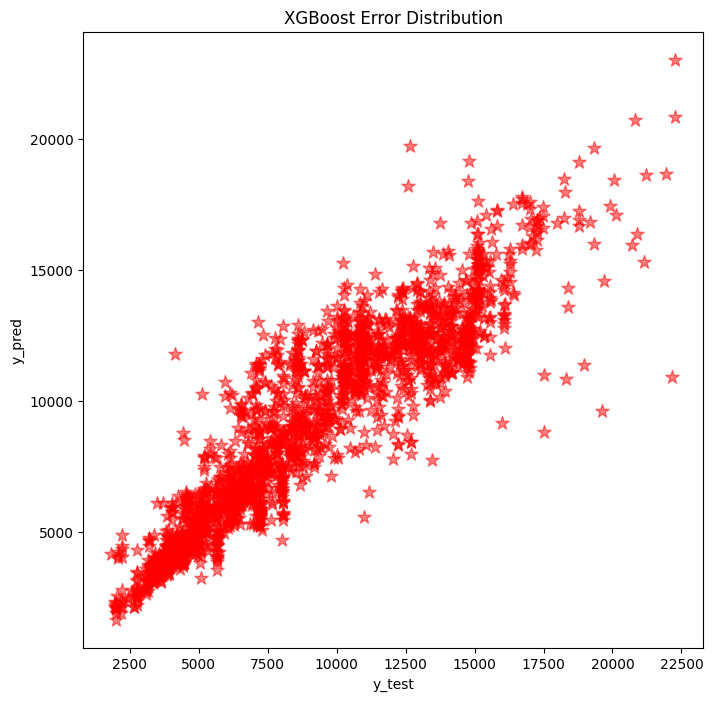

🏃 View run XGBoost at: http://127.0.0.1:5000/#/experiments/391970237538713523/runs/18819a8da3a74497af6162b1a994db57
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/391970237538713523


In [36]:
models = {
    'LinearRegression': [LinearRegression(),{}],
    'KNeighbors': [KNeighborsRegressor(),{'n_neighbors': [3,4,5,6,7,8,9]}],
    'DecisionTree': [DecisionTreeRegressor(),{'max_depth': [3,4,5,6,7,8,9,10]}],
    'Ridge': [Ridge(),{'alpha': [0.1, 1.0, 10.0]}],
    'Lasso': [Lasso(),{'alpha': [0.1, 1.0, 10.0]}],
    'RandomForest': [RandomForestRegressor(),{'n_estimators': [int(x) for x in np.linspace(50,500,num=50)], 'max_depth': [int(x) for x in np.linspace(5,30,5)]}],
    'AdaBoost': [AdaBoostRegressor(),{'n_estimators': [int(x) for x in np.linspace(50,500,num=50)], 'learning_rate': [0.0001,0.01, 0.1, 1.0],'loss':['linear', 'square', 'exponential']}],
    'XGBoost': [XGBRegressor(),{'n_estimators': [int(x) for x in np.linspace(50,500,num=50)], 'learning_rate': [0.0001,0.001,0.01, 0.1, 0.2], 'max_depth': [int(x) for x in np.linspace(5,30,5)]}]
}
best_models = {}



mlflow.set_experiment("Flight_Price")
mlflow.set_tracking_uri("http://127.0.0.1:5000")

for i, (model_name, model) in enumerate(models.items(), 1):
    with mlflow.start_run(run_name=f"{model_name}"):
        random_search = RandomizedSearchCV(model[0], model[-1], cv=5, scoring='neg_mean_squared_error', n_iter=10, random_state=40) 
        random_search.fit(x_train, y_train)
        y_train_pred = random_search.best_estimator_.predict(x_train)
        mse_train = mean_squared_error(y_train, y_train_pred)
        rmse_train = math.sqrt(mse_train)
        r2_train = r2_score(y_train, y_train_pred)
        print("**"*10+f" train: {model_name} "+"**"*10)
        print(f"{model_name} best params: {random_search.best_params_}")
        print(f"{model_name} MSE on train set: {mse_train}")
        print(f"{model_name} RMSE on train set: {rmse_train}")
        print(f"{model_name} R² on train set: {r2_train}")
        best_models[model_name] = random_search.best_estimator_
        mlflow.log_params(random_search.best_params_)
        y_pred = random_search.best_estimator_.predict(x_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = math.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        mlflow.log_metric("mse_train", mse_train)
        mlflow.log_metric("rmse_train", rmse_train)
        mlflow.log_metric("r2_train", r2_train)
        mlflow.log_metric("mse", mse)
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("r2", r2)
        if model_name == 'XGBoost':
            mlflow.xgboost.log_model(random_search.best_estimator_, f"{model_name}_model")
        else:
            mlflow.sklearn.log_model(random_search.best_estimator_, f"{model_name}_model")
        print("**"*10+f" Test: {model_name} "+"**"*10)
        print(f"{model_name} best params: {random_search.best_params_}")
        print(f"{model_name} MSE on test set: {mse}")
        print(f"{model_name} RMSE on test set: {rmse}")
        print(f"{model_name} R² on test set: {r2}")
        plt.figure(figsize = (8,8))
        plt.scatter(y_test, y_pred, alpha = 0.5, color = 'red',marker='*',s=100)
        plt.title(f"{model_name} Error Distribution")
        plt.xlabel("y_test")
        plt.ylabel("y_pred")
        plt.savefig(f"{model_name}_Error_Distribution.png",dpi=300)
        plt.show()


In [ ]:
best_models

{'LinearRegression': LinearRegression(),
 'KNeighbors': KNeighborsRegressor(n_neighbors=6),
 'DecisionTree': DecisionTreeRegressor(max_depth=9),
 'Ridge': Ridge(),
 'Lasso': Lasso(alpha=0.1),
 'RandomForest': RandomForestRegressor(max_depth=11, n_estimators=334),
 'AdaBoost': AdaBoostRegressor(learning_rate=0.1, n_estimators=114),
 'XGBoost': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=No